In [16]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
import nltk
from dotenv import load_dotenv
load_dotenv()

True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ricky/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [18]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [19]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [21]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q = 'bitcoin', 
    language = 'en', 
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

# Show sample article
bitcoin_news["articles"][0]

Total articles about Bitcoin: 4876


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Violet Blue',
 'title': "Twitter's Bitcoin hackers had almost limitless access",
 'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
 'publishedAt': '2020-07-17T19:30:40Z',
 'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the accou

In [22]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q = 'thereum', 
    language = 'en', 
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

# Show sample article
ethereum_news["articles"][0]

Total articles about Ethereum: 1


{'source': {'id': None, 'name': 'newsBTC'},
 'author': 'Aayush Jindal',
 'title': 'This Scenario Will Trigger A New Ethereum Rally: Key Levels To Watch',
 'description': 'Ethereum is trading above a major support at $225 against the US Dollar. ETH could start a fresh rally if it clears the $228 and $230 resistance levels in the near term. Ethereum is trading with a positive bias above the $224 and $225 support levels. The pric…',
 'url': 'https://www.newsbtc.com/2020/07/01/new-ethereum-rally-230/',
 'urlToImage': 'https://www.newsbtc.com/wp-content/uploads/2020/07/shutterstock_415985398.jpg',
 'publishedAt': '2020-07-01T06:58:57Z',
 'content': 'Ethereum is trading above a major support at $225 against the US Dollar. ETH could start a fresh rally if it clears the $228 and $230 resistance levels in the near term.\r\n<ul><li>Ethereum is trading … [+2208 chars]'}

In [23]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_news["articles"]:
    big_string = article['title'] + ' ' + article['content']
    sentiment = analyzer.polarity_scores(big_string)
    bitcoin_sentiments.append({
        "compound": sentiment["compound"],
        "positive": sentiment["pos"],
        "negative": sentiment["neg"],
        "neutral": sentiment["neu"],
        "date": article["publishedAt"][:10],
        "text": article["content"]
       
            
        })
        
bitcoin_df = pd.DataFrame(bitcoin_sentiments)  
bitcoin_df

,compound,date,negative,neutral,positive,text
0,0.0258,2020-07-17,0.050,0.898,0.052,Just hackers burning up 0day like it’s a fire ...
1,0.0000,2020-07-16,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
2,0.0772,2020-07-16,0.000,0.969,0.031,Reuters had previously reported the FBI would ...
3,0.5994,2020-07-18,0.000,0.886,0.114,Our investigation and cooperation with law enf...
4,0.6369,2020-07-28,0.000,0.887,0.113,The bitcoin bulls are back in town.\r\nThe pri...
5,0.1779,2020-07-20,0.041,0.903,0.056,The company blacklisted the bitcoin address\r\...
6,-0.9312,2020-07-23,0.268,0.732,0.000,Bitcoin scams are causing a lot of headaches r...
7,-0.8555,2020-07-23,0.187,0.813,0.000,"Much as with Twitter, the YouTube scams use Wo..."
8,-0.3818,2020-07-16,0.080,0.881,0.039,Image copyrightAFP/REUTERSImage caption\r\n Ki...
9,-0.9246,2020-07-15,0.314,0.608,0.078,A number of high-profile Twitter accounts were...


In [24]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_news["articles"]:
    big_string = article['title'] + ' ' + article['content']
    sentiment = analyzer.polarity_scores(big_string)
    ethereum_sentiments.append({
        "compound": sentiment["compound"],
        "positive": sentiment["pos"],
        "negative": sentiment["neg"],
        "neutral": sentiment["neu"],
        "date": article["publishedAt"][:10],
        "text": article["content"]
       
            
        })
        
ethereum_df = pd.DataFrame(ethereum_sentiments)  
ethereum_df

,compound,date,negative,neutral,positive,text
0,0.6486,2020-07-01,0.0,0.872,0.128,Ethereum is trading above a major support at $...


In [25]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.00000,100.000000,100.000000
mean,-0.108071,0.07190,0.879580,0.048550
std,0.520337,0.07439,0.073665,0.047453
min,-0.931200,0.00000,0.608000,0.000000
25%,-0.571900,0.00000,0.827000,0.000000
50%,-0.025800,0.05750,0.888000,0.049500
75%,0.401900,0.11150,0.931000,0.069000
max,0.891800,0.31400,1.000000,0.209000


In [26]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,1.0000,1.0,1.000,1.000
mean,0.6486,0.0,0.872,0.128
std,NaN,NaN,NaN,NaN
min,0.6486,0.0,0.872,0.128
25%,0.6486,0.0,0.872,0.128
50%,0.6486,0.0,0.872,0.128
75%,0.6486,0.0,0.872,0.128
max,0.6486,0.0,0.872,0.128


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcon

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary



In [28]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in output]
    return tokens

In [29]:
# Create a new tokens column for bitcoin
tokens = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df['tokens'] = tokens
bitcoin_df

,compound,date,negative,neutral,positive,text,tokens
0,0.0258,2020-07-17,0.050,0.898,0.052,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, saleimagine..."
1,0.0000,2020-07-16,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
2,0.0772,2020-07-16,0.000,0.969,0.031,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
3,0.5994,2020-07-18,0.000,0.886,0.114,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.6369,2020-07-28,0.000,0.887,0.113,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,..."
5,0.1779,2020-07-20,0.041,0.903,0.056,The company blacklisted the bitcoin address\r\...,"[company, blacklisted, bitcoin, addressillustr..."
6,-0.9312,2020-07-23,0.268,0.732,0.000,Bitcoin scams are causing a lot of headaches r...,"[bitcoin, scam, causing, lot, headache, right,..."
7,-0.8555,2020-07-23,0.187,0.813,0.000,"Much as with Twitter, the YouTube scams use Wo...","[much, twitter, youtube, scam, use, wozniaks, ..."
8,-0.3818,2020-07-16,0.080,0.881,0.039,Image copyrightAFP/REUTERSImage caption\r\n Ki...,"[image, copyrightafpreutersimage, caption, kim..."
9,-0.9246,2020-07-15,0.314,0.608,0.078,A number of high-profile Twitter accounts were...,"[number, highprofile, twitter, account, simult..."


In [30]:
# Create a new tokens column for ethereum
tokens2 = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df['tokens'] = tokens2
ethereum_df

,compound,date,negative,neutral,positive,text,tokens
0,0.6486,2020-07-01,0.0,0.872,0.128,Ethereum is trading above a major support at $...,"[ethereum, trading, major, support, u, dollar,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [32]:
from collections import Counter
from nltk import ngrams

In [33]:
# Generate the Bitcoin N-grams where N=2
def big_list_maker(token_lists):
    # Takes a list of tokens from each row from a df column 
    # and returns one large list
    big_list = []
    for list in token_lists:
        for token in list:
            big_list.append(token)
    return big_list

bit_coin_bigrams_count = Counter(ngrams(big_list_maker(bitcoin_df['tokens']), n = 2))
bit_coin_bigrams_count.most_common(10)

[(('satoshi', 'nakaboto'), 28),
 (('twitter', 'account'), 19),
 (('bitcoin', 'char'), 15),
 (('elon', 'musk'), 14),
 (('char', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14)]

In [34]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams_count = Counter(ngrams(big_list_maker(ethereum_df['tokens']), n = 2))
ethereum_bigrams_count.most_common(10)

[(('ethereum', 'trading'), 1),
 (('trading', 'major'), 1),
 (('major', 'support'), 1),
 (('support', 'u'), 1),
 (('u', 'dollar'), 1),
 (('dollar', 'eth'), 1),
 (('eth', 'could'), 1),
 (('could', 'start'), 1),
 (('start', 'fresh'), 1),
 (('fresh', 'rally'), 1)]

In [35]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Get the top 10 words for Bitcoin
bitcoin_word_counts_most_common = token_count(big_list_maker(bitcoin_df['tokens']))
bitcoin_word_counts_most_common

[('char', 100),
 ('bitcoin', 76),
 ('twitter', 55),
 ('account', 47),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('hack', 19),
 ('wednesday', 18),
 ('today', 17),
 ('reuters', 16)]

In [37]:
# Get the top 10 words for Ethereum
ethereum_word_counts_most_common = token_count(big_list_maker(ethereum_df['tokens']))
ethereum_word_counts_most_common

[('trading', 2),
 ('ethereum', 1),
 ('major', 1),
 ('support', 1),
 ('u', 1),
 ('dollar', 1),
 ('eth', 1),
 ('could', 1),
 ('start', 1),
 ('fresh', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

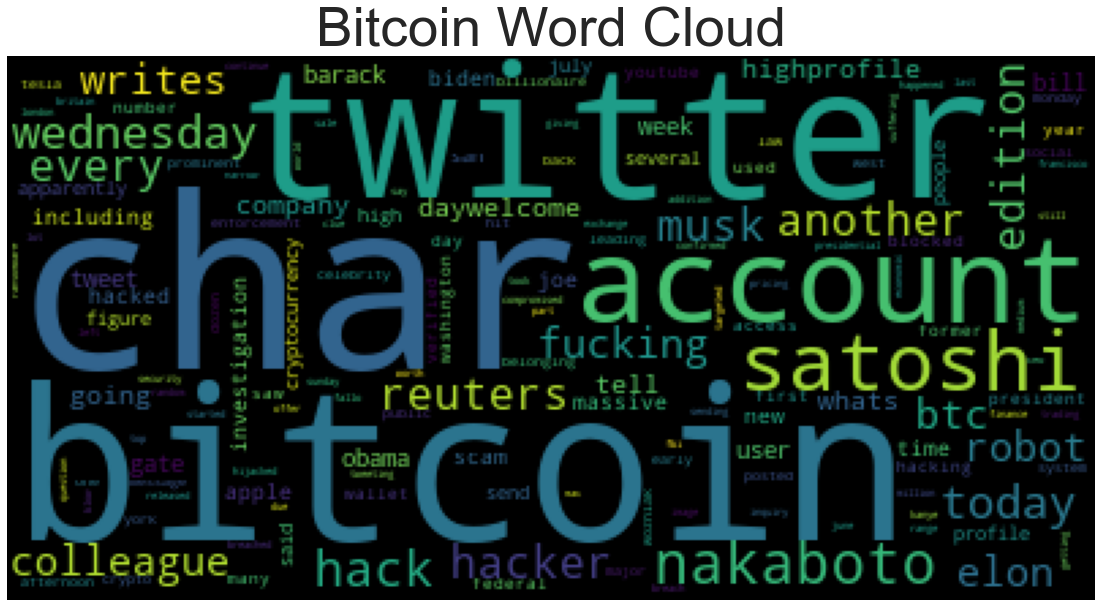

In [39]:
# Generate the Bitcoin word cloud
token_list = big_list_maker(bitcoin_df['tokens'])
input_words = ' '.join(token_list)
wc = WordCloud(collocations = False).generate(input_words)
plt.axis('off')
plt.title('Bitcoin Word Cloud', fontdict = {'fontsize' : 55})
plt.imshow(wc)

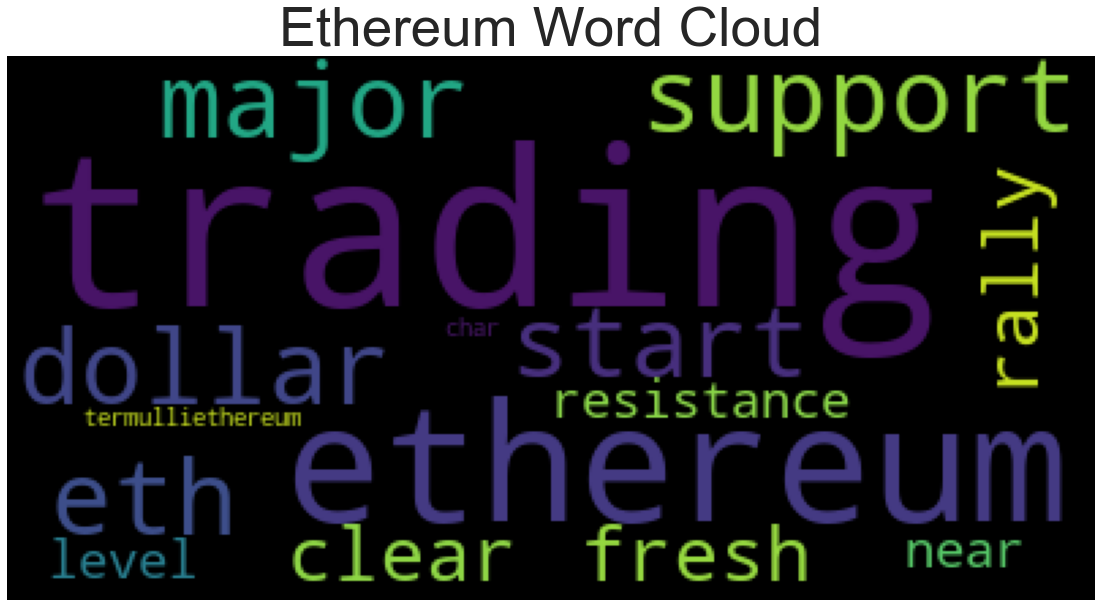

In [40]:
# Generate the Ethereum word cloud
token_list = big_list_maker(ethereum_df['tokens'])
input_words = ' '.join(token_list)
wc = WordCloud(collocations = False).generate(input_words)
plt.axis('off')
plt.title('Ethereum Word Cloud', fontdict = {'fontsize' : 55})
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [43]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [44]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [46]:
# Concatenate all of the bitcoin text together
bitcoin_big_string = ' '.join(bitcoin_df['text'])
bitcoin_big_string

'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars] Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars] Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars] Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars] The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a o

In [47]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)
# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [48]:
# Render the visualization
displacy.render(bitcoin_doc, style ='ent')

In [49]:
# List all Entities
def list_all_entities(doc):
    for ent in doc.ents:
        print(ent.text, ent.label_)
        
list_all_entities(bitcoin_doc)

Twitter ORG
Bitcoin GPE
30-minute TIME
Reuters ORG
FBI ORG
FBI ORG
one CARDINAL
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
Coinbase ORG
around 1,100 CARDINAL
Bitcoin GPE
Apple ORG
YouTube PRODUCT
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter ORG
YouTube PRODUCT
Wozniak PERSON
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
Last week DATE
over 100 CARDINAL
Twitter ORG
today DATE
last week DATE
Twitter ORG
today DATE
2020 DATE
the year DATE
John McAfee
  PERSON
Three years ago DATE
this date DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
San Francisco GPE
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afternoon TIME
Elon Musk ORG
Twitter

---

## Ethereum NER

In [50]:
# Concatenate all of the bitcoin text together
ethereum_big_string = ' '.join(ethereum_df['text'])
ethereum_big_string

'Ethereum is trading above a major support at $225 against the US Dollar. ETH could start a fresh rally if it clears the $228 and $230 resistance levels in the near term.\r\n<ul><li>Ethereum is trading … [+2208 chars]'

In [51]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [52]:
# Render the visualization
displacy.render(ethereum_doc, style ='ent')

In [53]:
# List all Entities
list_all_entities(ethereum_doc)

225 MONEY
US GPE
ETH PERSON
228 MONEY
230 MONEY
